<a href="https://colab.research.google.com/github/rajeshmore1/Outlier-Detection-By-Using-Local-Outlier-Factor-Algorithm/blob/main/Rajesh_More_Copy_of_M3W4D4_Assignment_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform univariate and multivariate anomaly detection on the `Sales` and `Profit` columns of the Superstore dataset.

* Use the `Local Outlier Factor` algorithm.
* Write in detail how this algorithm helps us in detecting anomalies.

[Resource](https://scikit-learn.org/stable/modules/outlier_detection.html)




**(Writing this blog for self understanding and revision purpose as this concept not tought in class.)**

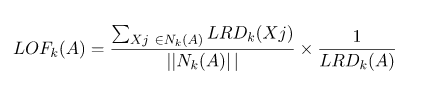

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors.

 It considers as outliers the samples that have a substantially lower density than their neighbors. This example shows how to use LOF for outlier detection which is the default use case of this estimator in scikit-learn. Note that when LOF is used for outlier detection it has no predict, decision_function and score_samples methods.

*  **Working of LOF:**

Local density is determined by estimating distances between data points that are neighbors (k-nearest neighbors). So for each data point, local density can be calculated. By comparing these we can check which data points have similar densities and which have a lesser density than its neighbors. The ones with the lesser densities are considered as the outliers.

Firstly, k-distances are distances between points that are calculated for each point to determine their k-nearest neighbors. The 2nd closest point is said to be the 2nd nearest neighbor to the point. Here is an image which represents k-distances of various neighbors in the cluster of a point:



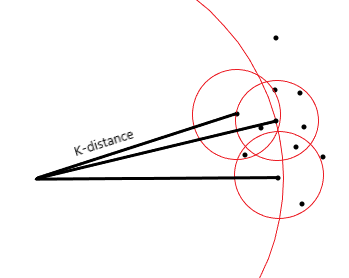

This distance is used to calculate the reachability distance. It is defined as the maximum of the distance between two points and the k-distance of that point. Refer to the following equation, where B is the point in the center and A is a point near to it.

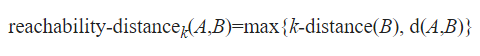

Here is an image which represents reachability distance of a point to various neighbours:
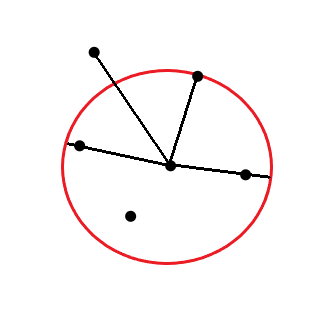

As you can see in the image given above, for points inside the circle the k-distance is considered and for points outside the cluster, the distance between points is considered.

Now, reachability distances to all of the k-nearest neighbors of a point are calculated to determine the Local Reachability Density (LRD) of that point. The local reachability density is a measure of the density of k-nearest points around a point which is calculated by taking the inverse of the sum of all of the reachability distances of all the k-nearest neighboring points. The closer the points are, the distance is lesser, and the density is more, hence the inverse is taken in the equation.

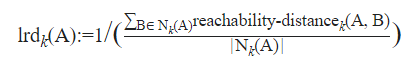

The calculation of Local outlier factor (LOR) is done by taking the ratio of the average of the lrds of k number of neighbors of a point and the lrd of that point. Here is the equation for LOR:

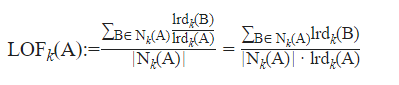

So, in the equation, if the density of the neighbors and the point are almost equal we can say they are quite similar; if the density of the neighbors is lesser than the density of the point we can say the point is an inlier i.e. inside the cluster, and if the density of the neighbors is more than the density of the point we can say that the point is an outlier. Refer to the following illustration:

LOF ~ 1  =>  Similar data point

LOF < 1  =>  Inlier ( similar data point which is inside the density cluster)

LOF > 1  =>  Outlier

Here is an image of the plot of LOF on a data set:

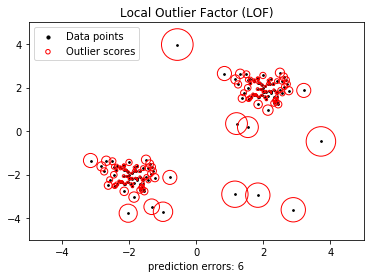

In [25]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

from scipy import stats

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
working_dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 4/Day 4/Copy of Superstore.xls'
df = pd.read_excel(working_dir_path)

In [11]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
df.shape

(9994, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

#Sales Variable Analysis

In [15]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

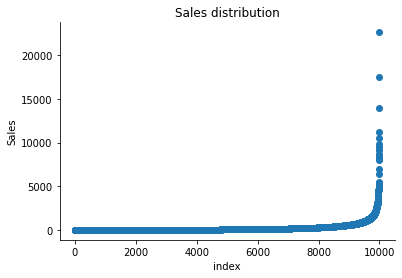

In [16]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


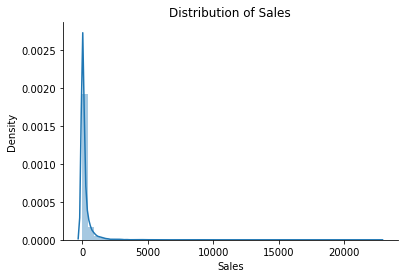

In [17]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

In [18]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


# LOF Algorithm on Sales Column:

In [60]:
# defining X feature
X= df['Sales'].values.reshape(-1,1)

In [57]:
X.shape

(9994,)

In [61]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit(X)


LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

In [33]:
#Note that when LOF is used for outlier detection it has no predict, decision_function and score_samples methods.
#use fit_predict to compute the predicted labels of the training samples
y_pred = clf.fit_predict(X)


In [35]:
ground_truth = np.ones(len(X), dtype=int)


In [36]:
n_errors = (y_pred != ground_truth).sum()


In [37]:
n_errors

1000

In [39]:
X_scores = clf.negative_outlier_factor_
X_scores

array([-1.05885686, -1.3738282 , -0.98104422, ..., -0.96793834,
       -1.01527037, -1.00322824])

In [40]:
X_scores.shape

(9994,)

In [45]:
# Another method
n_error_test = y_pred[y_pred == -1].size
n_error_test

1000

In [47]:
from pylab import *


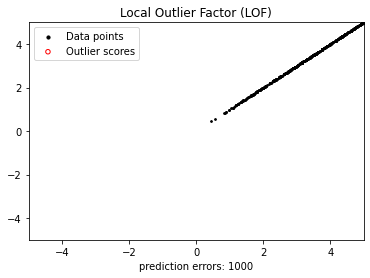

In [55]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:,1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:,0], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Profit Variable Analysis:

In [62]:
df.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

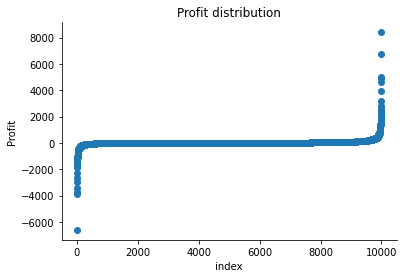

In [63]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


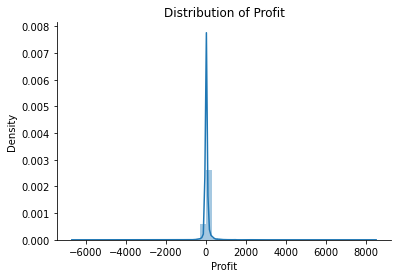

In [64]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

In [65]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


# LOF algorithm on Profit Column

In [66]:
# defining X feature
X2= df['Profit'].values.reshape(-1,1)

In [71]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
clf.fit(X2)


LocalOutlierFactor(algorithm='auto', contamination=0.01, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

In [72]:
#Note that when LOF is used for outlier detection it has no predict, decision_function and score_samples methods.
#use fit_predict to compute the predicted labels of the training samples
y_pred = clf.fit_predict(X2)


In [73]:
ground_truth = np.ones(len(X), dtype=int)


In [74]:
#I have changed contamination percentage to 0.01)
n_errors = (y_pred != ground_truth).sum()
n_errors

99

In [75]:
X_scores = clf.negative_outlier_factor_
X_scores

array([-0.96805003, -0.98072344, -0.99374014, ..., -1.00538553,
       -1.00693063, -1.00021943])

# Multivariate Anomaly Detection

Most of the analysis that we end up doing are multivariate due to complexity of the world we are living in. In multivariate anomaly detection, outlier is a combined unusual score on at least two variables.

So, using the Sales and Profit variables, we are going to build an unsupervised multivariate anomaly detection model.

### Sales & Profit

When we are in business, we expect that Sales & Profit are positive correlated. If some of the Sales data points and Profit data points are not positive correlated, they would be considered as outliers and need to be further investigated.

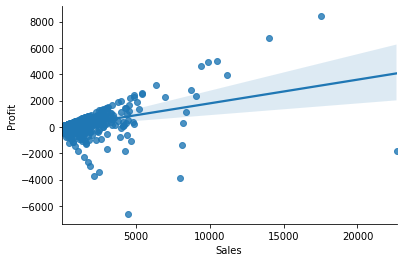

In [76]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

In [77]:
minmax = MinMaxScaler(feature_range=(0, 1))
X3 = minmax.fit_transform(df[['Sales','Profit']])

In [91]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=30, contamination=0.1)
clf.fit(X3)


LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=30, novelty=False, p=2)

In [92]:
df['multivariate_outlier'] = clf.fit_predict(X3)

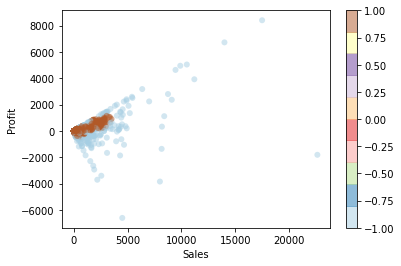

In [93]:
plt.scatter(df['Sales'], df['Profit'],
            c=df.multivariate_outlier, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar();

In [94]:
y_pred = clf.fit_predict(X3)


In [95]:
ground_truth = np.ones(len(X3), dtype=int)


In [96]:
#I have changed contamination percentage to 0.01)
n_errors = (y_pred != ground_truth).sum()
n_errors

1000

In [97]:
X_scores = clf.negative_outlier_factor_
X_scores

array([-1.12338506, -1.04101025, -0.9815691 , ..., -1.15595735,
       -0.98983298, -0.98699788])